In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os

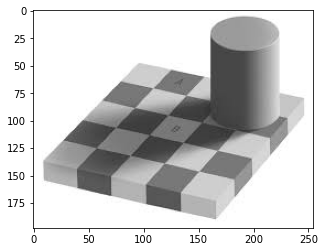

In [41]:
damier = imageio.imread("damier-ng.jpeg")
imageio.imwrite("damier-ng.png", damier)
plt.imshow(damier,cmap='gray')

In [19]:
damier.shape

(198, 255, 3)

In [6]:
print(damier[150,100])
print(damier[150])

[197 197 197]
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [224 224 224]
 [175 175 175]
 [178 178 178]
 [175 175 175]
 [177 177 177]
 [176 176 176]
 [175 175 175]
 [179 179 179]
 [179 179 179]
 [178 178 178]
 [177 177 177]
 [175 175 175]
 [174 174 174]
 [173 173 173]
 [173 173 173]
 [173 173 173]
 [173 173 173]
 [172 172 172]
 [172 172 172]
 [171 171 171]
 [170 170 170]
 [169 169 169]
 [169 169 169]
 [168 168 168]
 [167 167 167]
 [167 167 167]
 [167 167 167]
 [166 166 166]
 [166 166 166]
 [166 166 166]
 [166 166 166]
 [ 93  93  93]
 [ 92  92  92]
 [ 91  91  91]
 [ 90  90  90]
 [ 88  88  88]
 [ 86  86  86]
 [ 85  85  85]
 [ 84  84  84]
 [ 88  88  88]
 [ 88  88  88]
 [ 87  87  87]
 [ 86  86  86]
 [ 85  85  85]
 [ 84  84  84]
 [ 84  84  84]
 [ 83  83  83]
 [ 84  84  84]
 [ 83  83  83]
 [ 81  81  81]
 [ 79  79  79]
 [ 77  77  77]
 [ 75  75  75]
 [ 73  73  73]
 [ 72  72  72]
 [ 76  76  76]
 [ 90  90  

In [7]:
print(damier[100:105, 100:105])

[[[63 63 63]
  [63 63 63]
  [63 63 63]
  [63 63 63]
  [62 62 62]]

 [[63 63 63]
  [63 63 63]
  [63 63 63]
  [63 63 63]
  [61 61 61]]

 [[62 62 62]
  [62 62 62]
  [62 62 62]
  [62 62 62]
  [61 61 61]]

 [[61 61 61]
  [61 61 61]
  [61 61 61]
  [61 61 61]
  [60 60 60]]

 [[62 62 62]
  [62 62 62]
  [62 62 62]
  [62 62 62]
  [59 59 59]]]


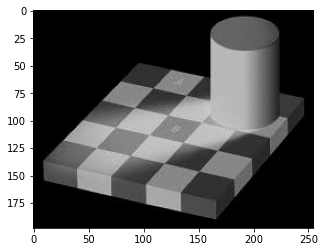

In [8]:
def inverse_intensity(im):
    im_temp = im.copy()
    im_temp = 255-im_temp    
    return(im_temp)
plt.imshow(inverse_intensity(damier),cmap="gray")

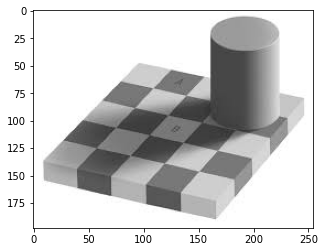

In [13]:
im_temp = damier.copy()
plt.imshow(im_temp)

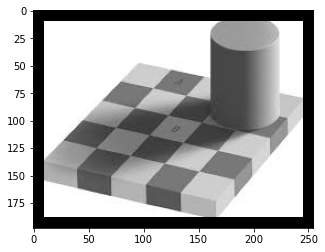

In [14]:
def bord(im,k):
    im_temp = im.copy()
    im_temp[:,:k] = 0
    im_temp[:,-k:] = 0
    im_temp[:k,:] = 0
    im_temp[-k:,:] = 0           
    return(im_temp)

plt.imshow(bord(damier,10),cmap="gray")

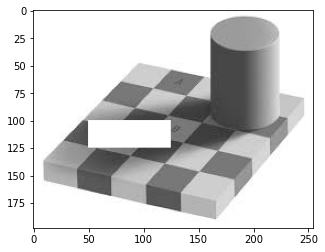

In [15]:
# Masque

def masque(im,pos,lar,lon):
    im_temp = im.copy()
    im_temp[pos[0]:pos[0]+lon,pos[1]:pos[1]+lar] = 255
    return(im_temp)
plt.imshow(masque(damier,[100,50],75,25),cmap="gray")

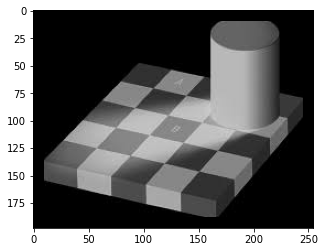

In [25]:
im1 = masque(bord(inverse_intensity(damier),10),[300,300],300,100)
plt.imshow(im1,cmap="gray")

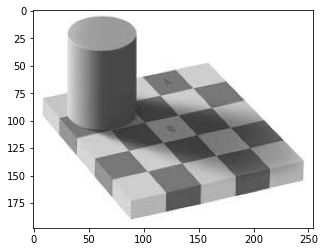

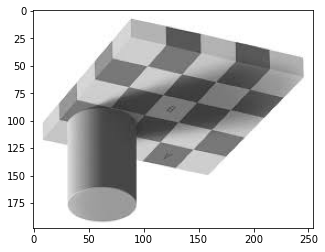

In [28]:
# Miroir

def mirroir(im,vertical=True):
    im_temp = im.copy()
    if vertical:
        im_temp = im_temp[:,::-1,:]
    else:
        im_temp = im_temp[::-1,:,:]
    return(im_temp)
damier = mirroir(damier,True)
plt.imshow(damier,cmap="gray")
plt.show()
plt.imshow(mirroir(damier,False),cmap="gray")
#plt.show()

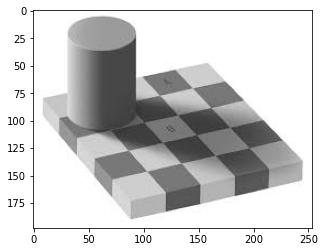

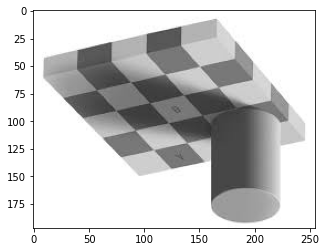

In [16]:
# Miroir

def mirroir(im,vertical=True):
    im_temp = im.copy()
    if vertical:
        im_temp = im_temp[:,np.arange(im_temp.shape[1]-1,0,-1)]
    else:
        im_temp = im_temp[np.arange(im_temp.shape[0]-1,0,-1),:]
    return(im_temp)
plt.imshow(mirroir(damier),cmap="gray")
plt.show()
plt.imshow(mirroir(damier,False),cmap="gray")
plt.show()

[[0.01 0.02 0.04 0.02 0.01]
 [0.02 0.04 0.08 0.04 0.02]
 [0.04 0.08 0.16 0.08 0.04]
 [0.02 0.04 0.08 0.04 0.02]
 [0.01 0.02 0.04 0.02 0.01]]


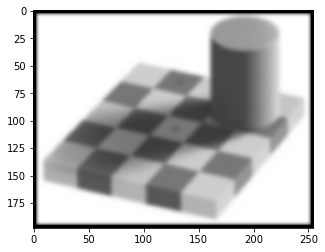

In [42]:
# Filtrer

K = np.array([[1,2,4,2,1],[2,4,8,4,2],[4,8,16,8,4],[2,4,8,4,2],[1,2,4,2,1]])/100.0
print(K)
def filtrer(im,K):
    im_temp = im.copy()*0
    s = int((K.shape[0]+1)/2)
    for i in range(s,im.shape[0]-s):
        for j in range(s,im.shape[1]-s):
            im_temp[i,j] = np.sum(K*im[i-(s-1):i+s,j-(s-1):j+s])
    return(im_temp)

plt.imshow(filtrer(filtrer(filtrer(damier[:,:,0],K),K),K),cmap="gray")

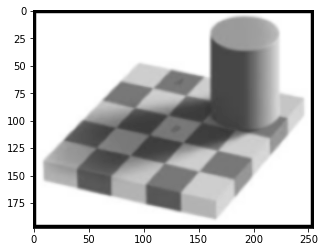

In [43]:
plt.imshow(filtrer(damier[:,:,0],K),cmap="gray")

(198, 255, 3)


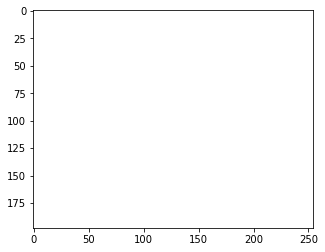

In [25]:
im_temp = 255 - damier.copy()*0
print(im_temp.shape)
plt.imshow(im_temp,cmap="gray")

In [44]:
Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #effet relief
G = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #effet relief
Gy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) #effet relief

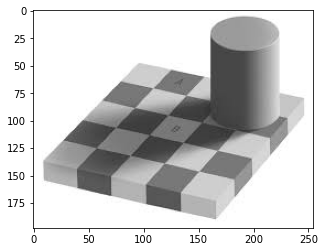

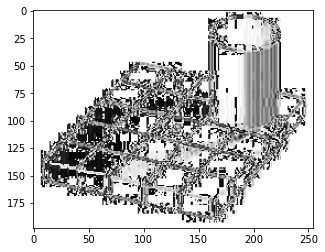

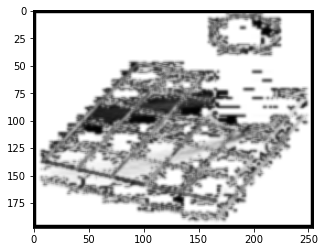

In [49]:
plt.imshow(damier,cmap="gray")
plt.show()
plt.imshow(255-filtrer(damier,Gy),cmap="gray")
plt.show()
plt.imshow(filtrer(255-filtrer(damier[:,:,0],Gy),K),cmap="gray")

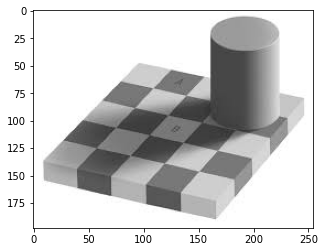

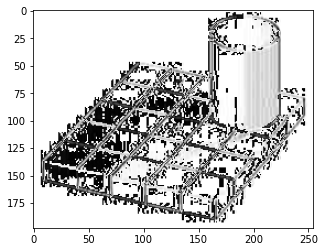

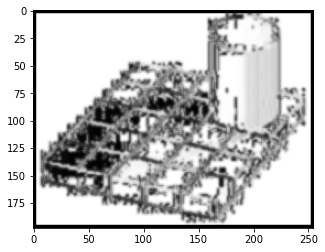

In [53]:
plt.imshow(damier,cmap="gray")
plt.show()
plt.imshow(255-filtrer(damier[:,:,0],Gx),cmap="gray")
plt.show()
plt.imshow(filtrer(255-filtrer(damier[:,:,0],Gx),K),cmap="gray")

In [ ]:
plt.imshow(damier,cmap="gray")
plt.show()
plt.imshow(255-filtrer(damier[:,:,0],Gx),cmap="gray")
plt.show()
plt.imshow(filtrer(255-filtrer(damier[:,:,0],Gx),K),cmap="gray")